# Economic Analysis Project

Importing Necessary Library - API Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

#installing Libraries some other important libraries for project
#1. pip install fredapi
#2. pip install plotly

pd.set_option("display.max_columns", 500)
plt.style.use('fivethirtyeight')

# API Key Importing
from dotenv import load_dotenv
import os

load_dotenv()
fred_api_key = os.getenv("API_KEY")


### 1. Create the 'FRED' Object.
- This object will be used to search and pull data from website.
- Fred allows us to do search the data and pull down the data.

In [3]:
fred = Fred(api_key=fred_api_key)
fred

### 2. Searching for Economic Data
- This search is similar to how we search on website searchbar but its more pythonic and in pandas.
- we will use `object.search` for economic data.
- Search Results are sorted by 'popularity'

In [4]:
s_p_search = fred.search('S&P', order_by='popularity')
s_p_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2026-02-03,2026-02-03,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:14:39-06:00,100,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2026-02-03,2026-02-03,S&P 500,2016-02-03,2026-02-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-02 19:01:52-06:00,90,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-03,2026-02-03,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,85,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2026-02-03,2026-02-03,ICE BofA US High Yield Index Effective Yield,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:14:44-06:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2026-02-03,2026-02-03,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:15:43-06:00,85,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRNCUSBWA618NRUG,XRNCUSBWA618NRUG,2026-02-03,2026-02-03,Exchange Rate (market+estimated) for Botswana,1960-01-01,2019-01-01,Annual,A,National Currency Units per US Dollar,National Currency Units per US $,Not Seasonally Adjusted,NSA,2021-01-21 13:32:52-06:00,3,Source ID: xr When using these data in your r...
DDOI02JOA156NWDB,DDOI02JOA156NWDB,2026-02-03,2026-02-03,Bank Deposits to GDP for Jordan,1962-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:31:00-05:00,3,"The total value of demand, time and saving dep..."
RGDPNABWA666NRUG,RGDPNABWA666NRUG,2026-02-03,2026-02-03,Real GDP at Constant National Prices for Botswana,1960-01-01,2019-01-01,Annual,A,Millions of 2017 U.S. Dollars,Mil. of 2017 U.S. $,Not Seasonally Adjusted,NSA,2021-11-08 13:29:58-06:00,3,Source ID: rgdpna When using these data in yo...


In [5]:
s_p_search.shape

(1000, 15)

In [6]:
s_p_search.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2026-02-03,2026-02-03,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:14:39-06:00,100,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2026-02-03,2026-02-03,S&P 500,2016-02-03,2026-02-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-02 19:01:52-06:00,90,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-03,2026-02-03,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,85,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2026-02-03,2026-02-03,ICE BofA US High Yield Index Effective Yield,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:14:44-06:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2026-02-03,2026-02-03,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:15:43-06:00,85,The ICE BofA Option-Adjusted Spreads (OASs) ar...
DJIA,DJIA,2026-02-03,2026-02-03,Dow Jones Industrial Average,2016-02-03,2026-02-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-02 19:04:21-06:00,77,The observations for the Dow Jones Industrial ...
CSUSHPISA,CSUSHPISA,2026-02-03,2026-02-03,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2026-01-27 08:15:29-06:00,73,"For more information regarding the index, plea..."
STLENI,STLENI,2026-02-03,2026-02-03,St. Louis Fed Economic News Index: Real GDP No...,2013-04-01,2025-10-01,Quarterly,Q,Percent Change at Annual Rate,% Chg. at Annual Rate,Seasonally Adjusted Annual Rate,SAAR,2026-01-30 09:50:27-06:00,73,St. Louis Fed’s Economic News Index (ENI) uses...
BAMLHE00EHYIOAS,BAMLHE00EHYIOAS,2026-02-03,2026-02-03,ICE BofA Euro High Yield Index Option-Adjusted...,1997-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:14:35-06:00,73,This data represents the Option-Adjusted Sprea...


### 3. Pulling Raw Data And Plotting

<Axes: title={'center': 'S&P 500'}>

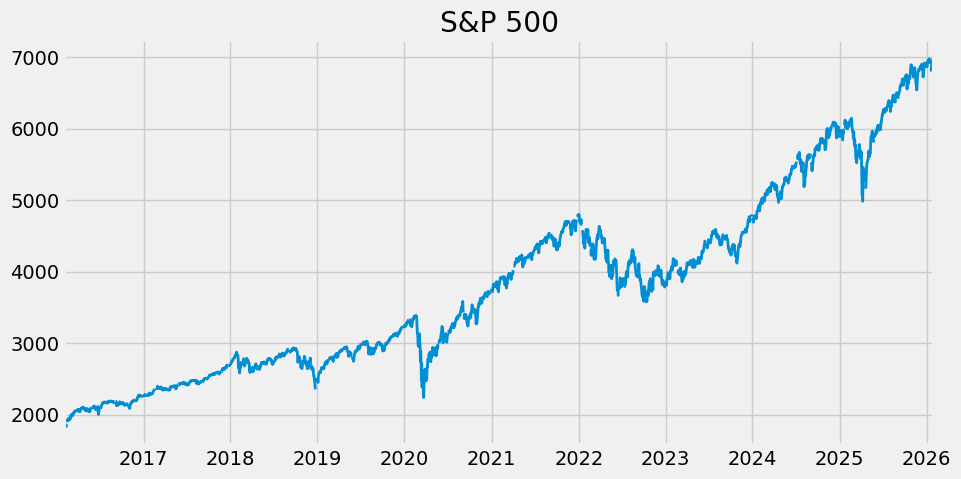

In [7]:
# Pulling using object.get_series and providing id of series
sp500_data = fred.get_series(series_id='SP500')

# Plotting 
sp500_data.plot(figsize=(10,5), title='S&P 500', linewidth=2)

### 4. Pull and Join Multiple Data Series
- Pulling Unemployment Rate Datasets.


In [10]:
uemp_data = fred.search('unemployement', order_by='popularity')
uemp_data

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2026-02-03,2026-02-03,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2025-12-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2026-01-13 08:08:07-06:00,98,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2026-02-03,2026-02-03,Unemployment Rate,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:10:37-06:00,98,The unemployment rate represents the number of...
SAHMREALTIME,SAHMREALTIME,2026-02-03,2026-02-03,Real-time Sahm Rule Recession Indicator,1959-12-01,2025-12-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2026-01-09 08:23:02-06:00,87,Sahm Recession Indicator signals the start of ...
PAYEMS,PAYEMS,2026-02-03,2026-02-03,"All Employees, Total Nonfarm",1939-01-01,2025-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2026-01-09 08:11:04-06:00,85,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2026-02-03,2026-02-03,Initial Claims,1967-01-07,2026-01-24,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2026-01-29 07:33:44-06:00,82,An initial claim is a claim filed by an unempl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARBEURN,ARBEURN,2026-02-03,2026-02-03,"Unemployment Rate in Benton County, AR",1990-01-01,2025-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2026-01-16 13:18:59-06:00,6,These data come from the Current Population Su...
LOIURN,LOIURN,2026-02-03,2026-02-03,Unemployment Rate in Louisville-Jefferson Coun...,1990-01-01,2025-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2026-01-16 13:18:58-06:00,6,None
NJBERG5URN,NJBERG5URN,2026-02-03,2026-02-03,"Unemployment Rate in Bergen County, NJ",1990-01-01,2025-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2026-01-16 13:04:19-06:00,6,These data come from the Current Population Su...


**Pulling Unrate Dataset**

In [ ]:
unrate_dataset = fred.get_series('UNRATE')

unrate_dataset

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2025-08-01    4.3
2025-09-01    4.4
2025-10-01    NaN
2025-11-01    4.5
2025-12-01    4.4
Length: 936, dtype: float64

**Plotting Unrate**

<Axes: >

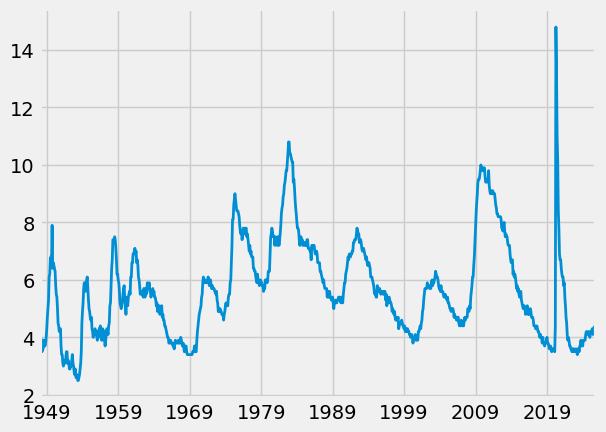

In [12]:
unrate_dataset.plot(lw=2)

- filtering down more precisely dataset that has unemployement rate and not monthly adjusted.

In [22]:
unemp_df = fred.search('unemployement rate state', filter=('frequency','Monthly'))

After Precisely Filtering Out we are down from 1000 rows to 143 rows.

In [26]:
unemp_df= unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2026-02-03,2026-02-03,Unemployment Rate,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:10:37-06:00,98,The unemployment rate represents the number of...
U6RATE,U6RATE,2026-02-03,2026-02-03,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:11:02-06:00,72,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2026-02-03,2026-02-03,Unemployment Rate - Black or African American,1972-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:03-06:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2026-02-03,2026-02-03,Unemployment Rate in California,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:30-06:00,64,None
LNS14024887,LNS14024887,2026-02-03,2026-02-03,Unemployment Rate - 16-24 Yrs.,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:12:38-06:00,64,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OKUR,OKUR,2026-02-03,2026-02-03,Unemployment Rate in Oklahoma,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:07-06:00,27,None
HIUR,HIUR,2026-02-03,2026-02-03,Unemployment Rate in Hawaii,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:13-06:00,25,None
DCUR,DCUR,2026-02-03,2026-02-03,Unemployment Rate in the District of Columbia,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:32-06:00,23,None


locating unemployement rate where title is `Unemployement Rate`.

In [27]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2026-02-03,2026-02-03,Unemployment Rate,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:10:37-06:00,98,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2026-02-03,2026-02-03,Unemployment Rate - Black or African American,1972-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:03-06:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2026-02-03,2026-02-03,Unemployment Rate in California,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:30-06:00,64,None
LNS14024887,LNS14024887,2026-02-03,2026-02-03,Unemployment Rate - 16-24 Yrs.,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:12:38-06:00,64,The series comes from the 'Current Population ...
LNS14000024,LNS14000024,2026-02-03,2026-02-03,Unemployment Rate - 20 Yrs. & over,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:14-06:00,58,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WVUR,WVUR,2026-02-03,2026-02-03,Unemployment Rate in West Virginia,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:47:29-06:00,28,None
OKUR,OKUR,2026-02-03,2026-02-03,Unemployment Rate in Oklahoma,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:07-06:00,27,None
HIUR,HIUR,2026-02-03,2026-02-03,Unemployment Rate in Hawaii,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:13-06:00,25,None


As of Now, We have sucessfully created unemployement meta dataframe.

Next is we loop with get series each id to pull down series data.